This notebook will introduce you to two important methods in data analysis: histogramming and curve fitting. You will do this first with synthetic data and then with real data.

Part 1: 1D histograming with random data

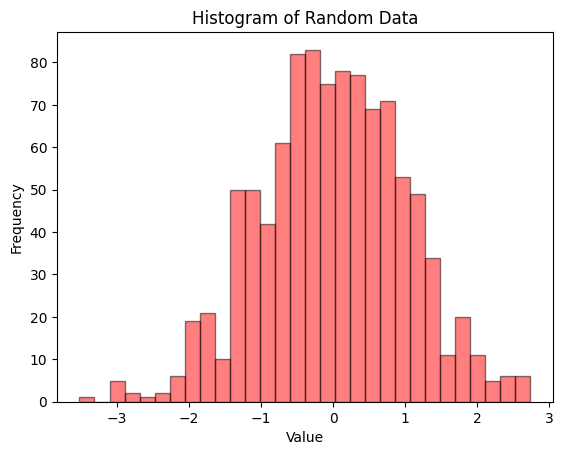

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Generate random data
data = np.random.randn(1000)

# Create a histogram
# most of these parameters should be obvious except alpha that is the transparency.
plt.hist(data, bins=30, alpha=0.5, color='red', edgecolor='black')
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()



Question 1:
What type of distribution does this look like? That indicates the type of distribution that the random number generator is picking randomly from.

Exercise 1: Vary the number of bins and discuss what happens. Add more code blocks if you wish to report more variations. You can also customize the transparency and colors as well if you wish.

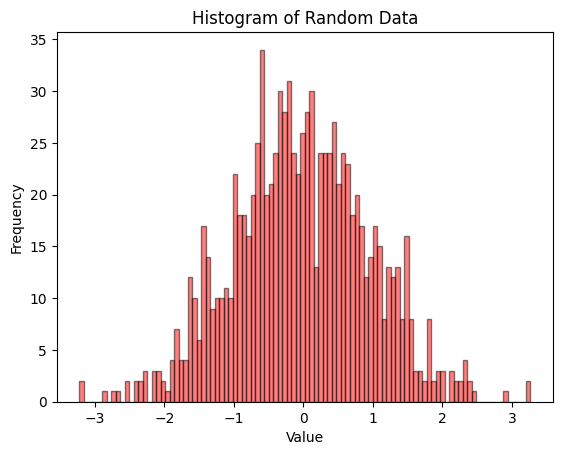

In [3]:
#write code to vary the histogram number
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Generate random data
data = np.random.randn(1000)

# Create a histogram
# most of these parameters should be obvious except alpha that is the transparency.
plt.hist(data, bins=100, alpha=0.5


, color='red', edgecolor='black')
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [3]:
#write code to vary the histogram number


It may seem that the number of bins to use is arbritrary, however, there are actually several statistical rules to decide how many bins to use of varying complexity, which depends on what assumes you care to make about your data, how much effort you want to do and what you want to minimize.
The most common rule is spreadsheet is to set the number of bins equal to the square root of the number of data points; there is no good reason behind that choice.
The two most common rules and Sturges's formula and Scott's normal reference rule.

Sturges's formula: $$k=\lceil \log _{2}n\rceil +1$$
This was derived almost a century ago from considering binomial distributions, which become normal distributions for large n, and is likely the most commonly used, although it can underfit for small n (n<30 usually>) or oversmooth for large n (n>200)

In [4]:
#use sturges rule to calculate the number of bins (we had 1000 points)
bins_sturges = int(1 + np.log2(len(data)))

Exercise 2: Using the number of bins from Sturges's formula as the bin variable, plot a new histogram. Discuss how it compares to your previous ones?

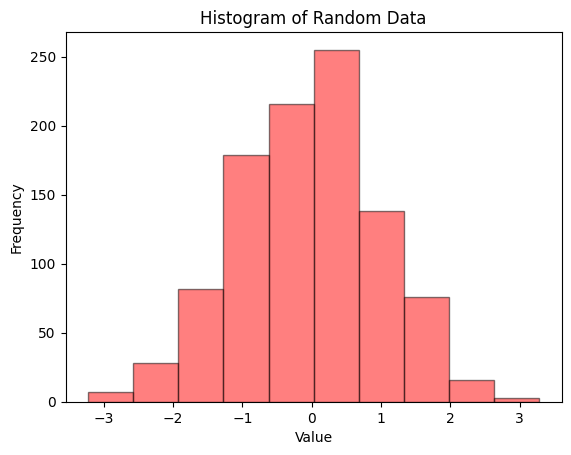

In [5]:
#code for exercise 2
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Generate random data
data = np.random.randn(1000)

# Create a histogram
# most of these parameters should be obvious except alpha that is the transparency.
plt.hist(data, bins=bins_sturges, alpha=0.5, color='red', edgecolor='black')
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

The other rule is Scott's rule to calculate the optimal bin width:
$$h = \frac{3.49\hat{\sigma}}{\sqrt[3]{n}},$$
This rule was derived ~45 years ago, and is optimal in the sense of the minimzing the mean square error of the probability function for normal distributions. Note it doesn't just use the number of points, but also the standard deviation of the data. We also have to calculate the number of bins from the range of the data.

In [6]:
n = len(data)
sigma_hat = np.std(data, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
h = 3.49 * sigma_hat / n**(1/3)  # Scott's rule formula
data_min, data_max = data.min(), data.max()
bins_scott= int((data_max - data_min) / h)


Exercise 3: Using the number of bins from Scott's rule as the bin variable, plot a new histogram, and of course, discuss how it differs.

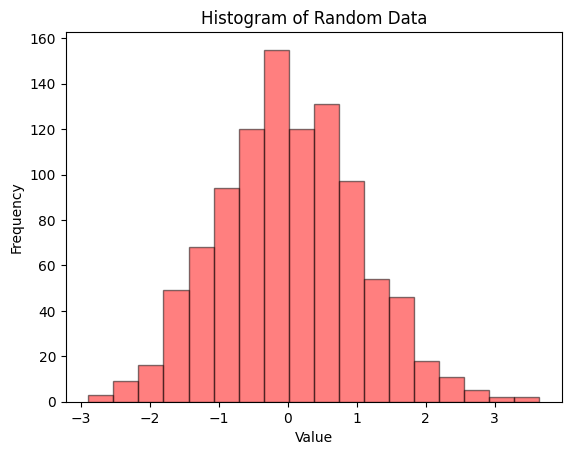

In [7]:
#code for exercise 3
# Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import scipy

# Generate random data
data = np.random.randn(1000)

# Create a histogram
# most of these parameters should be obvious except alpha that is the transparency.
plt.hist(data, bins=bins_scott, alpha=0.5, color='red', edgecolor='black')
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Part 2: Curve fitting a histogram with a Gaussian 

Some times we would like an analytic expression and the most common is to fit with a Gaussian

In [8]:
#we will now define a gaussian function. 
#A gaussian has two parameters; the mean value, mu and the standard deviation sigma,
def gaussian(x, mu, sigma):
    return 1/(sigma * np.sqrt(2 * np.pi)) * np.exp(- (x - mu)**2 / (2 * sigma**2))


In order to curve fit a gaussian, we need to save more information from the historgram, in particular an array of the bin heights and bin borders, and we need to normalize the histogram as a gaussian is normalize.
We also need to have error measures, but by calculating the uncertaintity in the parameters, and by calculating the integrated mean standard error, i.e., the derivation from the histogram and the gaussian.

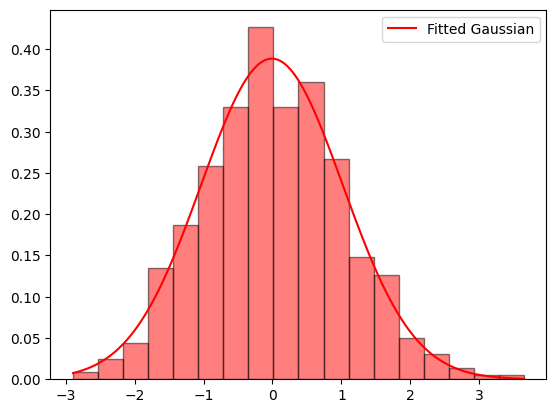

Mean (mu): -0.007639849911284638, Standard Deviation (sigma): 1.026741017337337
Integrated Mean Squared Error (IMSE): 0.0012452283109906572
Parameter uncertanities: [0.03607148 0.02948424]


In [9]:
# Calculate histogram
bin_heights, bin_borders, _ =plt.hist(data, bins=bins_scott, alpha=0.5,density=True, color='red', edgecolor='black')
# the ,_ says to ignore anything else calculate by the histogram function (like shapre info)
#density=True, normalizes the histogram
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
p0 = [np.mean(data), np.std(data)]
# Use curve_fit to fit the gaussian function to the bin_centers and bin_heights
popt, pcov = scipy.optimize.curve_fit(gaussian, bin_centers, bin_heights,p0=p0)

# Plot the fitted Gaussian curve
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Fitted Gaussian', color='r')

plt.legend()
plt.show()

print(f"Mean (mu): {popt[0]}, Standard Deviation (sigma): {popt[1]}")
# Calculate the IMSE
# Use the fitted Gaussian to predict values over the fine grid
predicted_density = gaussian(x_interval_for_fit, *popt)

# Calculate the actual density using the histogram data
# This involves interpolating the bin heights to match the fine grid used for the fit
actual_density = np.interp(x_interval_for_fit, bin_centers, bin_heights)

# Calculate the squared difference between the actual and predicted densities
squared_diff = (actual_density - predicted_density) ** 2

# Integrate the squared difference over the range
# Approximate the integral by summing the squared differences and multiplying by the step size
imse = np.sum(squared_diff) * (x_interval_for_fit[1] - x_interval_for_fit[0])

print(f"Integrated Mean Squared Error (IMSE): {imse}")


# Calculate the standard deviation (sqrt of diagonal elements of the covariance matrix)
perr = np.sqrt(np.diag(pcov))
print(f"Parameter uncertanities: {perr}")




Question 2: The distribution this data is drawn from is a normal (aka gaussian) distribution with mean 0 and sigma of 1. Why is the answer slightly different?

Exercise 4: Test the rationale (aka hypothesis ) you developed to answer Question 2. You might need to change how many data points are selected, and then the number of bins, and then redo the plot, uncertanity and error calculations

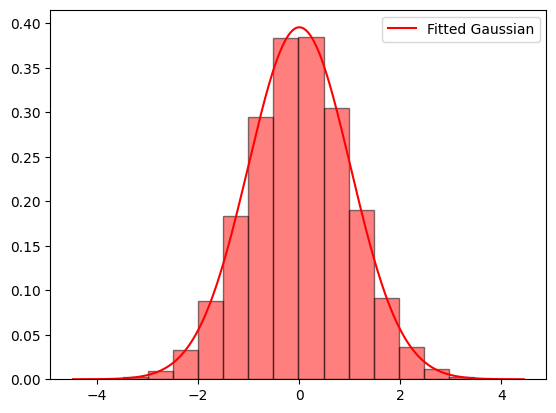

Mean (mu): 0.0035097911119885586, Standard Deviation (sigma): 1.008430177874068
Integrated Mean Squared Error (IMSE): 0.00010574007769762199
Parameter uncertanities: [0.00219611 0.00179312]


In [10]:
#code for exercise 4
# Calculate histogram
data = np.random.randn(100000)
bin_heights, bin_borders, _ =plt.hist(data, bins=bins_scott, alpha=0.5,density=True, color='red', edgecolor='black')
# the ,_ says to ignore anything else calculate by the histogram function (like shapre info)
#density=True, normalizes the histogram
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
p0 = [np.mean(data), np.std(data)]
# Use curve_fit to fit the gaussian function to the bin_centers and bin_heights
popt, pcov = scipy.optimize.curve_fit(gaussian, bin_centers, bin_heights,p0=p0)

# Plot the fitted Gaussian curve
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Fitted Gaussian', color='r')

plt.legend()
plt.show()

print(f"Mean (mu): {popt[0]}, Standard Deviation (sigma): {popt[1]}")
# Calculate the IMSE
# Use the fitted Gaussian to predict values over the fine grid
predicted_density = gaussian(x_interval_for_fit, *popt)

# Calculate the actual density using the histogram data
# This involves interpolating the bin heights to match the fine grid used for the fit
actual_density = np.interp(x_interval_for_fit, bin_centers, bin_heights)

# Calculate the squared difference between the actual and predicted densities
squared_diff = (actual_density - predicted_density) ** 2

# Integrate the squared difference over the range
# Approximate the integral by summing the squared differences and multiplying by the step size
imse = np.sum(squared_diff) * (x_interval_for_fit[1] - x_interval_for_fit[0])

print(f"Integrated Mean Squared Error (IMSE): {imse}")


# Calculate the standard deviation (sqrt of diagonal elements of the covariance matrix)
perr = np.sqrt(np.diag(pcov))
print(f"Parameter uncertanities: {perr}")




Part 3: Histogramming in 2D. It is common in physics to have multidemensionaldata, and so 2D histogramming is often common to look at the distribution of data characterized by two variables, followed by display via either a heatmap or a contour map

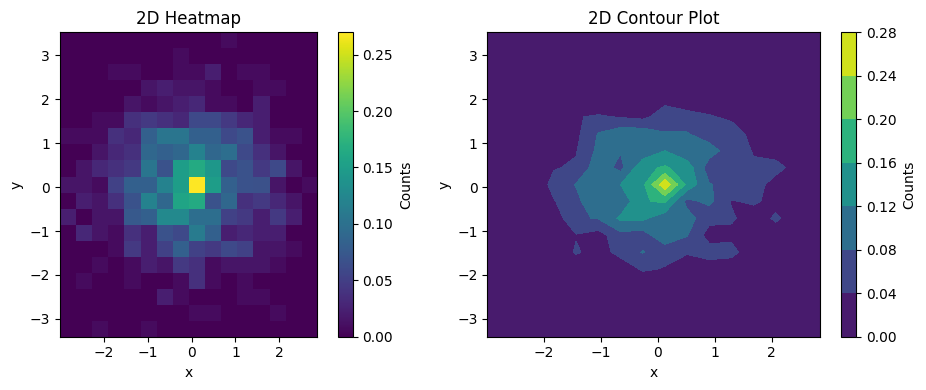

In [12]:


# Generate random numbers from a 2D normal distribution
x = np.random.randn(1000)  # 1000 random numbers for x
y = np.random.randn(1000)  # 1000 random numbers for y

n = len(x)# assumes each data point has x and y
sigma_x = np.std(x, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
hx = 3.49 * sigma_x / n**(1/3)  # Scott's rule formula
x_min, x_max = x.min(), x.max()
bins_scott_x= int((x_max - x_min) / hx)
sigma_y = np.std(y, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
hy = 3.49 * sigma_y/ n**(1/3)  # Scott's rule formula
y_min, y_max = y.min(), y.max()
bins_scott_y= int((y_max - y_min) / hy)
# Creating a 2D histogram from the random numbers
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[bins_scott_x,bins_scott_y], density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plotting the 2D heatmap
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.title('2D Heatmap')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Counts')

# Plotting the 2D contour plot
plt.subplot(1, 2, 2)
plt.contourf(heatmap.T, extent=extent, cmap='viridis')
plt.title('2D Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Counts')

plt.tight_layout()
plt.show()


Note, this isn't the best looking 2D gaussian; you can tell by the lack of symmetry.


Exercise 5: Figure out how you might get a better looking 2D gaussian (hint it has to do with the underlying data )and modify the code until you think it looks reasonable

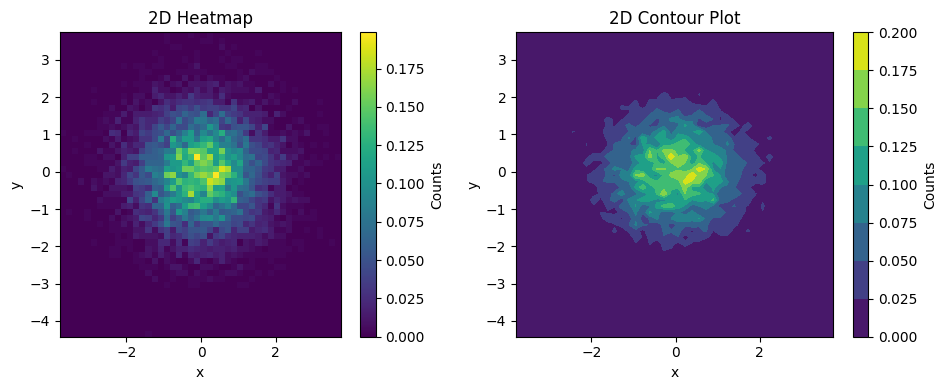

In [13]:
#code for exercise 5


# Generate random numbers from a 2D normal distribution
x = np.random.randn(10000)  # 10000 random numbers for x
y = np.random.randn(10000)  # 10000 random numbers for y

n = len(x)# assumes each data point has x and y
sigma_x = np.std(x, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
hx = 3.49 * sigma_x / n**(1/3)  # Scott's rule formula
x_min, x_max = x.min(), x.max()
bins_scott_x= int((x_max - x_min) / hx)
sigma_y = np.std(y, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
hy = 3.49 * sigma_y/ n**(1/3)  # Scott's rule formula
y_min, y_max = y.min(), y.max()
bins_scott_y= int((y_max - y_min) / hy)
# Creating a 2D histogram from the random numbers
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[bins_scott_x,bins_scott_y], density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

# Plotting the 2D heatmap
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.imshow(heatmap.T, extent=extent, origin='lower', cmap='viridis')
plt.title('2D Heatmap')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Counts')

# Plotting the 2D contour plot
plt.subplot(1, 2, 2)
plt.contourf(heatmap.T, extent=extent, cmap='viridis')
plt.title('2D Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Counts')

plt.tight_layout()
plt.show()


Of course, we would like to more rigorously figure out how to see how good our fit is and go let's do a 2D gaussian fit with uncertainity and error analysis.

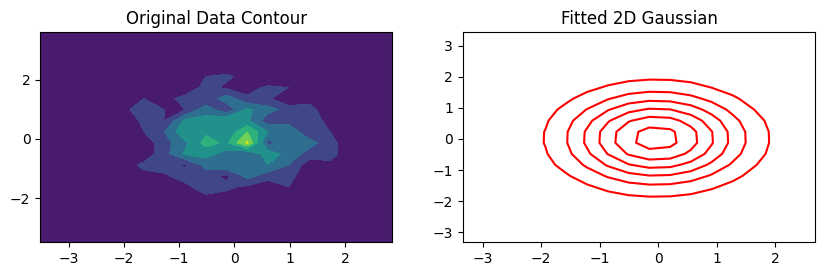

Uncertainties in the fitted parameters: [0.00403174 0.02444397 0.02380111 0.02447388 0.02380179]
Integrated Square Mean Error (ISME): 0.00019130461659886972


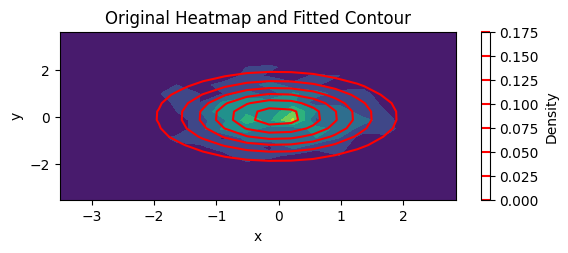

In [14]:
# Generate random numbers from a 2D normal distribution
x = np.random.randn(1000)  # 1000 random numbers for x
y = np.random.randn(1000)  # 1000 random numbers for y

n = len(x)# assumes each data point has x and y
sigma_x = np.std(x, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
hx = 3.49 * sigma_x / n**(1/3)  # Scott's rule formula
x_min, x_max = x.min(), x.max()
bins_scott_x= int((x_max - x_min) / hx)
sigma_y = np.std(y, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
hy = 3.49 * sigma_y/ n**(1/3)  # Scott's rule formula
y_min, y_max = y.min(), y.max()
bins_scott_y= int((y_max - y_min) / hy)
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[bins_scott_x,bins_scott_y], density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# Assuming x, y, bins_scott_x, bins_scott_y, and heatmap generation remains unchanged.

def gaussian_2d(xy, amplitude, x0, y0, sigma_x, sigma_y):
    x, y = xy
    return amplitude * np.exp(-(((x - x0)**2 / (2 * sigma_x**2)) + ((y - y0)**2 / (2 * sigma_y**2)))).ravel()

# Correcting preparation for curve fitting
x_centers = (xedges[:-1] + xedges[1:]) / 2
y_centers = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(x_centers, y_centers)
xy = np.vstack([X.ravel(), Y.ravel()])
z = heatmap.T.ravel()  # Ensure z is correctly transposed to match xy arrangement

# Curve fitting
popt, pcov = scipy.optimize.curve_fit(gaussian_2d, xy, z, p0=[1, 0, 0, 1, 1])

# Plotting the fitting results
Z_fit = gaussian_2d(xy, *popt).reshape(X.shape)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.contourf(heatmap.T, extent=extent, cmap='viridis') 
plt.title('Original Data Contour')

plt.subplot(2, 2, 2)
plt.contour(X, Y, Z_fit, colors='red')  # Fitted Gaussian contour
plt.title('Fitted 2D Gaussian')
plt.show()

plt.subplot(2, 1, 2)
plt.contourf(heatmap.T, extent=extent, cmap='viridis')
plt.contour(X, Y, Z_fit, colors='red')  # Superimposed fitted Gaussian contour
plt.title('Original Heatmap and Fitted Contour')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Density')


# Extracting uncertainties of the parameters
perr = np.sqrt(np.diag(pcov))
print("Uncertainties in the fitted parameters:", perr)

# Ensure Z_fit matches heatmap dimensions for ISME calculation
# Transpose Z_fit if its shape is the transpose of heatmap's shape
isme = np.sum((heatmap - Z_fit.T)**2) / np.size(Z_fit)
print("Integrated Square Mean Error (ISME):", isme)




Exercise 6:Take your changes you had to do in exercise 5 and add the code right above to fit a gaussian, display the fitted gaussian, the contour with the fitted gaussian and the uncertainties and ISME

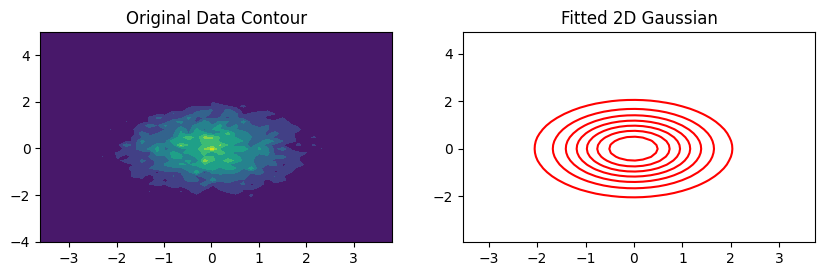

Uncertainties in the fitted parameters: [0.00101358 0.00638737 0.00641744 0.00638759 0.00641745]
Integrated Square Mean Error (ISME): 6.122328989622112e-05


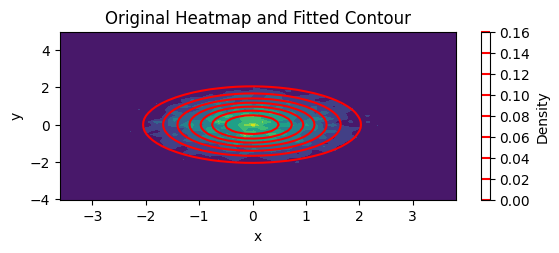

In [15]:
#exercise 6 code
# Generate random numbers from a 2D normal distribution
x = np.random.randn(10000)  # 10000 random numbers for x
y = np.random.randn(10000)  # 10000 random numbers for y

n = len(x)# assumes each data point has x and y
sigma_x = np.std(x, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
hx = 3.49 * sigma_x / n**(1/3)  # Scott's rule formula
x_min, x_max = x.min(), x.max()
bins_scott_x= int((x_max - x_min) / hx)
sigma_y = np.std(y, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
hy = 3.49 * sigma_y/ n**(1/3)  # Scott's rule formula
y_min, y_max = y.min(), y.max()
bins_scott_y= int((y_max - y_min) / hy)
heatmap, xedges, yedges = np.histogram2d(x, y, bins=[bins_scott_x,bins_scott_y], density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
# Assuming x, y, bins_scott_x, bins_scott_y, and heatmap generation remains unchanged.

def gaussian_2d(xy, amplitude, x0, y0, sigma_x, sigma_y):
    x, y = xy
    return amplitude * np.exp(-(((x - x0)**2 / (2 * sigma_x**2)) + ((y - y0)**2 / (2 * sigma_y**2)))).ravel()

# Correcting preparation for curve fitting
x_centers = (xedges[:-1] + xedges[1:]) / 2
y_centers = (yedges[:-1] + yedges[1:]) / 2
X, Y = np.meshgrid(x_centers, y_centers)
xy = np.vstack([X.ravel(), Y.ravel()])
z = heatmap.T.ravel()  # Ensure z is correctly transposed to match xy arrangement

# Curve fitting
popt, pcov = scipy.optimize.curve_fit(gaussian_2d, xy, z, p0=[1, 0, 0, 1, 1])

# Plotting the fitting results
Z_fit = gaussian_2d(xy, *popt).reshape(X.shape)

plt.figure(figsize=(10, 6))
plt.subplot(2, 2, 1)
plt.contourf(heatmap.T, extent=extent, cmap='viridis') 
plt.title('Original Data Contour')

plt.subplot(2, 2, 2)
plt.contour(X, Y, Z_fit, colors='red')  # Fitted Gaussian contour
plt.title('Fitted 2D Gaussian')
plt.show()

plt.subplot(2, 1, 2)
plt.contourf(heatmap.T, extent=extent, cmap='viridis')
plt.contour(X, Y, Z_fit, colors='red')  # Superimposed fitted Gaussian contour
plt.title('Original Heatmap and Fitted Contour')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Density')


# Extracting uncertainties of the parameters
perr = np.sqrt(np.diag(pcov))
print("Uncertainties in the fitted parameters:", perr)

# Ensure Z_fit matches heatmap dimensions for ISME calculation
# Transpose Z_fit if its shape is the transpose of heatmap's shape
isme = np.sum((heatmap - Z_fit.T)**2) / np.size(Z_fit)
print("Integrated Square Mean Error (ISME):", isme)




Part 4: Now let's turn to real data! For the rest of this, you will be looking an analysis of a principle-component analysis of the structures from an molecular dynamics simulation of the protein Thrombin. We might get to principle component analysis but all you need to know is that there are five numbers for each structure in the protein simulation, and by looking at histograms we can tell, what are the main structures we have uncovered in the simulation.

First, we need to read in the data. We will read them in as a pandas array like last time, but then convert to a numpy array in order to do everything you do so far.

In [17]:
import pandas as pd

# Specify the file path
file_path = '../data/TM_projections.txt'

#read as a pandas array
df = pd.read_csv(file_path, sep=' ', header=None) #the file is space deliminated

# Assign each column to a separate variable
data_x1 = df[0]
data_x2 = df[1]
data_x3 = df[2]
data_x4 = df[3]
data_x5 = df[4]

# If you want the data as a numpy array, you can convert them as follows:
data_x1 = df[0].to_numpy()
data_x2 = df[1].to_numpy()
data_x3 = df[2].to_numpy()
data_x4 = df[3].to_numpy()
data_x5 = df[4].to_numpy()


Exercise 7: Calculate the number of bins using Scott's rule, histogram, fit a gaussian, calculate the errors and uncertanities for the first column. (Hint: Part 2 with some of Part 1 with appropriate variable changes)

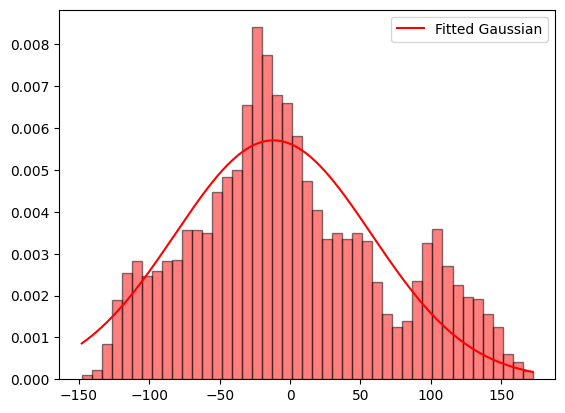

Mean (mu): -11.925511423559715, Standard Deviation (sigma): 69.87832260188755
Integrated Mean Squared Error (IMSE): 0.00032479643393328186
Parameter uncertanities: [4.46766942 3.71398904]


In [18]:
n = len(data_x1)
sigma_x1 = np.std(data_x1, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
h_x1= 3.49 * sigma_x1 / n**(1/3)  # Scott's rule formula
data_x1_min, data_x1_max = data_x1.min(), data_x1.max()
bins_scott_x1= int((data_x1_max - data_x1_min) / h_x1)
# Calculate histogram
bin_heights, bin_borders, _ =plt.hist(data_x1, bins=bins_scott_x1, alpha=0.5,density=True, color='red', edgecolor='black')
# the ,_ says to ignore anything else calculate by the histogram function (like shapre info)
#density=True, normalizes the histogram
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
p0 = [np.mean(data_x1), np.std(data_x1)]
# Use curve_fit to fit the gaussian function to the bin_centers and bin_heights
popt, pcov = scipy.optimize.curve_fit(gaussian, bin_centers, bin_heights,p0=p0)

# Plot the fitted Gaussian curve
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Fitted Gaussian', color='r')

plt.legend()
plt.show()

print(f"Mean (mu): {popt[0]}, Standard Deviation (sigma): {popt[1]}")
# Calculate the IMSE
# Use the fitted Gaussian to predict values over the fine grid
predicted_density = gaussian(x_interval_for_fit, *popt)

# Calculate the actual density using the histogram data
# This involves interpolating the bin heights to match the fine grid used for the fit
actual_density = np.interp(x_interval_for_fit, bin_centers, bin_heights)

# Calculate the squared difference between the actual and predicted densities
squared_diff = (actual_density - predicted_density) ** 2

# Integrate the squared difference over the range
# Approximate the integral by summing the squared differences and multiplying by the step size
imse = np.sum(squared_diff) * (x_interval_for_fit[1] - x_interval_for_fit[0])

print(f"Integrated Mean Squared Error (IMSE): {imse}")

# Calculate the standard deviation (sqrt of diagonal elements of the covariance matrix)
perr = np.sqrt(np.diag(pcov))
print(f"Parameter uncertanities: {perr}")

Question 3: Does this look like it would be well-represented by a single gaussian? Note, a major point of this type of work is to identify different conformational states. Given this, does the figure seem reasonable?

It might make sense to see if multiple gaussians might fit. Well let's try that.

First, we need to define a multi-gaussian function

In [19]:
def multi_gaussian(x, *params):
    y = np.zeros_like(x)
    for i in range(0, len(params), 3):
        amplitude = params[i]
        mean = params[i+1]
        sigma = params[i+2]
        y += amplitude * np.exp(-((x - mean)**2) / (2 * sigma**2))
    return y


Now let's do a multi-Gaussian fit. you have to put after num_gaussians how many to test, and also make a guess at the the amplitude, center and standard derivation of each gaussian.


Exercise 8: Try 2 with guesses from the histogram of the amplitude, center, standard deviation for each gaussian. Bad guesses mean the optimization might not converge. What happens? Does the fit improve? If you want to, you can explore 3 gaussians or more.

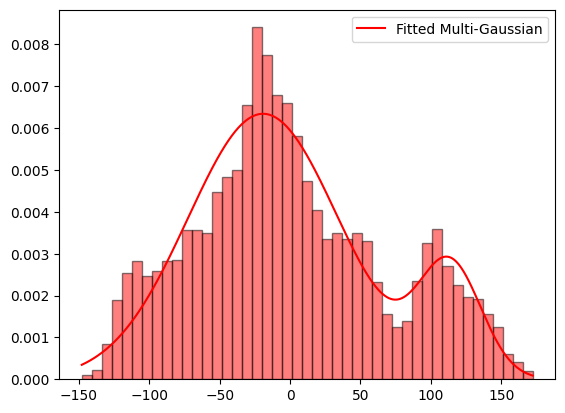

Gaussian 1 - Mean (mu): -19.202011734952254, Standard Deviation (sigma): 53.41104682800205
Gaussian 2 - Mean (mu): 113.81389817780399, Standard Deviation (sigma): 22.118397374646722
Integrated Mean Squared Error (IMSE): 0.00014489245264734336
Gaussian 1:
  Amplitude uncertainty: 0.0002646752597854977
  Mean uncertainty: 2.7005579682090697
  Standard Deviation uncertainty: 3.025705482422716
Gaussian 2:
  Amplitude uncertainty: 0.00040305950726152027
  Mean uncertainty: 4.1867986701714495
  Standard Deviation uncertainty: 4.277046748709922


In [20]:
# User input for the number of Gaussians
num_gaussians = 2 #how many


# Adjust initial guesses based on the number of Gaussians
# for each gaussian the initial guess of the amplitude, center and standard dev, seperated by commas
p0 = [0.006,0,50,0.004,100,50] # initial guesses

# Fit the multi-Gaussian model to the data
popt, pcov = scipy.optimize.curve_fit(multi_gaussian, bin_centers, bin_heights, p0=p0, maxfev=10000)

# Plotting
plt.hist(data_x1, bins=bins_scott_x1, alpha=0.5, density=True, color='red', edgecolor='black')
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_interval_for_fit, multi_gaussian(x_interval_for_fit, *popt), label='Fitted Multi-Gaussian', color='r')
plt.legend()
plt.show()

# Calculate and print parameters for each Gaussian
for i in range(num_gaussians):
    print(f"Gaussian {i+1} - Mean (mu): {popt[i*3+1]}, Standard Deviation (sigma): {popt[i*3+2]}")

# IMSE Calculation remains the same as in your script
predicted_density = multi_gaussian(x_interval_for_fit, *popt)
squared_diff = (actual_density - predicted_density) ** 2
imse = np.sum(squared_diff) * (x_interval_for_fit[1] - x_interval_for_fit[0])
print(f"Integrated Mean Squared Error (IMSE): {imse}")

#Calculating parameter uncertanities
perr = np.sqrt(np.diag(pcov))

parameter_names = ['Amplitude', 'Mean', 'Standard Deviation']

for i in range(num_gaussians):
    print(f"Gaussian {i+1}:")
    for j, name in enumerate(parameter_names):
        param_index = i * len(parameter_names) + j  # Calculate the index of the parameter in the flat list
        print(f"  {name} uncertainty: {perr[param_index]}")


We did all this for the first column of data. That is the first principle component, which is the most important. 


Exercise 9: Plot a histogram with a single gaussian fit for the 2nd and 5th principle components, that is the second and fifth data columns we read in.

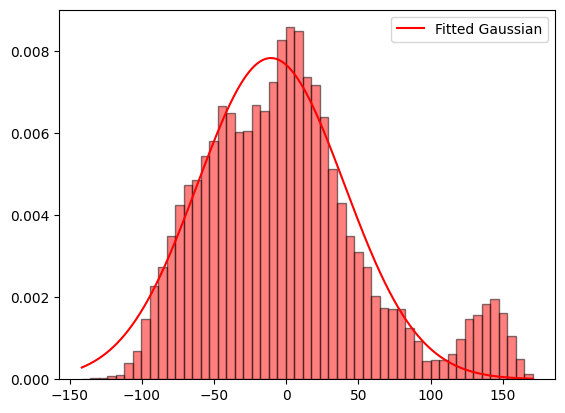

Mean (mu): -10.621514594522571, Standard Deviation (sigma): 50.96447639336906
Integrated Mean Squared Error (IMSE): 0.00018066025479702313
Parameter uncertanities: [1.8637618  1.52634745]


In [21]:
# code for Exercise 8; column 2
data_x1 = data_x2
n = len(data_x1)
sigma_x1 = np.std(data_x1, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
h_x1= 3.49 * sigma_x1 / n**(1/3)  # Scott's rule formula
data_x1_min, data_x1_max = data_x1.min(), data_x1.max()
bins_scott_x1= int((data_x1_max - data_x1_min) / h_x1)
# Calculate histogram
bin_heights, bin_borders, _ =plt.hist(data_x1, bins=bins_scott_x1, alpha=0.5,density=True, color='red', edgecolor='black')
# the ,_ says to ignore anything else calculate by the histogram function (like shapre info)
#density=True, normalizes the histogram
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
p0 = [np.mean(data_x1), np.std(data_x1)]
# Use curve_fit to fit the gaussian function to the bin_centers and bin_heights
popt, pcov = scipy.optimize.curve_fit(gaussian, bin_centers, bin_heights,p0=p0)

# Plot the fitted Gaussian curve
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Fitted Gaussian', color='r')

plt.legend()
plt.show()

print(f"Mean (mu): {popt[0]}, Standard Deviation (sigma): {popt[1]}")
# Calculate the IMSE
# Use the fitted Gaussian to predict values over the fine grid
predicted_density = gaussian(x_interval_for_fit, *popt)

# Calculate the actual density using the histogram data
# This involves interpolating the bin heights to match the fine grid used for the fit
actual_density = np.interp(x_interval_for_fit, bin_centers, bin_heights)

# Calculate the squared difference between the actual and predicted densities
squared_diff = (actual_density - predicted_density) ** 2

# Integrate the squared difference over the range
# Approximate the integral by summing the squared differences and multiplying by the step size
imse = np.sum(squared_diff) * (x_interval_for_fit[1] - x_interval_for_fit[0])

print(f"Integrated Mean Squared Error (IMSE): {imse}")

# Calculate the standard deviation (sqrt of diagonal elements of the covariance matrix)
perr = np.sqrt(np.diag(pcov))
print(f"Parameter uncertanities: {perr}")


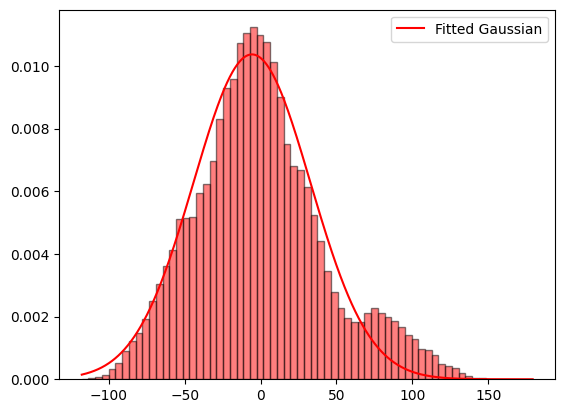

Mean (mu): -5.691758108117383, Standard Deviation (sigma): 38.48726783548812
Integrated Mean Squared Error (IMSE): 0.00013465198742290907
Parameter uncertanities: [0.9298608  0.75977533]


In [22]:
# code for Exercise 8; column 5
data_x1 = data_x5
n = len(data_x1)
sigma_x1 = np.std(data_x1, ddof=1)  # Sample standard deviation (ddof=1 for an unbiased estimator)
h_x1= 3.49 * sigma_x1 / n**(1/3)  # Scott's rule formula
data_x1_min, data_x1_max = data_x1.min(), data_x1.max()
bins_scott_x1= int((data_x1_max - data_x1_min) / h_x1)
# Calculate histogram
bin_heights, bin_borders, _ =plt.hist(data_x1, bins=bins_scott_x1, alpha=0.5,density=True, color='red', edgecolor='black')
# the ,_ says to ignore anything else calculate by the histogram function (like shapre info)
#density=True, normalizes the histogram
bin_centers = bin_borders[:-1] + np.diff(bin_borders) / 2
p0 = [np.mean(data_x1), np.std(data_x1)]
# Use curve_fit to fit the gaussian function to the bin_centers and bin_heights
popt, pcov = scipy.optimize.curve_fit(gaussian, bin_centers, bin_heights,p0=p0)

# Plot the fitted Gaussian curve
x_interval_for_fit = np.linspace(bin_borders[0], bin_borders[-1], 1000)
plt.plot(x_interval_for_fit, gaussian(x_interval_for_fit, *popt), label='Fitted Gaussian', color='r')

plt.legend()
plt.show()

print(f"Mean (mu): {popt[0]}, Standard Deviation (sigma): {popt[1]}")
# Calculate the IMSE
# Use the fitted Gaussian to predict values over the fine grid
predicted_density = gaussian(x_interval_for_fit, *popt)

# Calculate the actual density using the histogram data
# This involves interpolating the bin heights to match the fine grid used for the fit
actual_density = np.interp(x_interval_for_fit, bin_centers, bin_heights)

# Calculate the squared difference between the actual and predicted densities
squared_diff = (actual_density - predicted_density) ** 2

# Integrate the squared difference over the range
# Approximate the integral by summing the squared differences and multiplying by the step size
imse = np.sum(squared_diff) * (x_interval_for_fit[1] - x_interval_for_fit[0])

print(f"Integrated Mean Squared Error (IMSE): {imse}")

# Calculate the standard deviation (sqrt of diagonal elements of the covariance matrix)
perr = np.sqrt(np.diag(pcov))
print(f"Parameter uncertanities: {perr}")


We could try and fit the second and fifth components to multigaussian distributions, but it actually isn't that easy as the second potential gaussian just doesn't have very much data in it, so the fitting requires more finesse than we have in this class. Though feel free to experiment on your own.

We have now discussed that this data -- from a simulation of thrombin where each data point represents a specific 3D structure -- is not well-represented by a single gaussian in 1D, but what happens in 2D.

Exercise 10: Do a 2D histogram of the first and second principle components, and display as a contour map. Hint: The first part of part 3. Discuss the result probability distribution, refer back to the 1D probability distributions. Does the 2D histograming provide a different view on the data than just looking at the 1D distributions? Discuss of course.

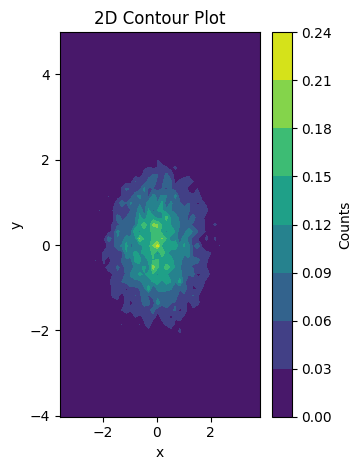

In [23]:

# Code for exercise 10
x = data_x1
y = data_x2
plt.subplot(1, 2, 2)
plt.contourf(heatmap.T, extent=extent, cmap='viridis')
plt.title('2D Contour Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.colorbar(label='Counts')

plt.tight_layout()
plt.show()


Gaussian 1 - Mean (mu): -19.201964081781927, Standard Deviation (sigma): 53.41102244088075
Gaussian 2 - Mean (mu): 113.81427603305082, Standard Deviation (sigma): 22.118623583602137
Integrated Mean Squared Error (IMSE): 0.0001448924223262711

If you are curious as to what this physically represents, look at the image Phy266_structure.png in the data directory. It depicts a superposition of representative structures from the three highest probability locations on the 2D histogram.